In [2]:
from urllib import urlencode
from urllib import urlretrieve

from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.table import Table
import numpy as np
from IPython.display import Image

from astropy.visualization import astropy_mpl_style
import matplotlib.pyplot as plt
plt.style.use(astropy_mpl_style)
%matplotlib inline

from astropy.coordinates import EarthLocation
from astropy.time import Time
from astropy.coordinates import AltAz
from astropy.coordinates import get_sun

Enter the name of an astronomical object: Sirius


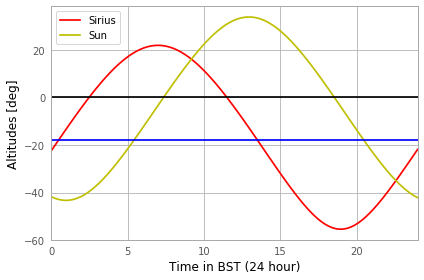

In [26]:
name=raw_input('Enter the name of an astronomical object: ')
obj = SkyCoord.from_name(name)
UoB = EarthLocation(lat='51d23m',lon='-2d19m',height=200*u.m)
observing_time = Time('2018-10-04 23:00')
aa = AltAz(location=UoB,obstime=observing_time)
obj.transform_to(aa).alt

delta_hours = np.linspace(0, 24, 100)*u.hour
full_night_times = observing_time + delta_hours
full_night_aa_frames = AltAz(location=UoB, obstime=full_night_times)
full_night_aa_coos = obj.transform_to(full_night_aa_frames)
full_night_sun_coos = get_sun(full_night_times).transform_to(full_night_aa_frames)

plt.plot(delta_hours, full_night_aa_coos.alt, 'r', label=name)
plt.plot(delta_hours, full_night_sun_coos.alt.deg, 'y', label='Sun')

plt.xlabel('Time in BST (24 hour)')
plt.ylabel('Altitudes [deg]')
plt.xlim(0,24)
plt.axhline(-18, color='blue')
plt.axhline(0, color='k')
plt.legend(loc='upper left')
plt.tight_layout()

Enter the name of an astronomical object: Sirius


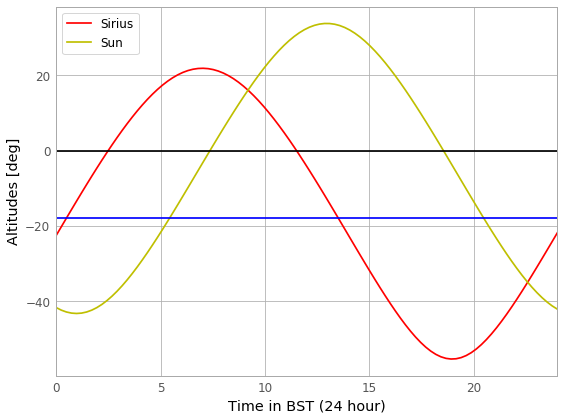

In [28]:
run obs_aid.py